In [1]:
from datas.helpers import * 
import matplotlib.pyplot as plt
import os, glob, cv2, random #glob 파일들의 리스트를 뽑을 때 사용
import seaborn as sns #설치필요 ,  Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
import pandas as pd #Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.

In [2]:
base_path = 'datas'

X, y = read_csv(os.path.join(base_path, 'dataset.csv')) #os.path로 파일경로 갖고옴

print(X.shape, y.shape) #이미지수, Y축, X축, 채널의 수

(2874, 26, 34, 1) (2874, 1)


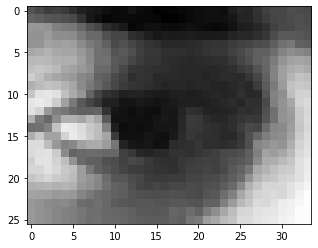

In [3]:
plt.imshow(X[0].reshape((26,34)), cmap='gray') #cmap은 그림을 흑백으로 만들때 씀

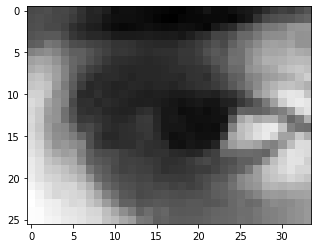

In [4]:
#cv2.flip(이미지, 옵션(0:상하반전, 1:좌우반전))
plt.imshow(cv2.flip(X[0].reshape(26,34),1), cmap='gray')

img = cv2.flip(X[0].reshape(26,34,1),1).reshape(26,34,1) #reshape만 했을 경우 채널이 사라짐 그래서 reshape을 한번 더 필요
plt.imshow(img, cmap='gray')

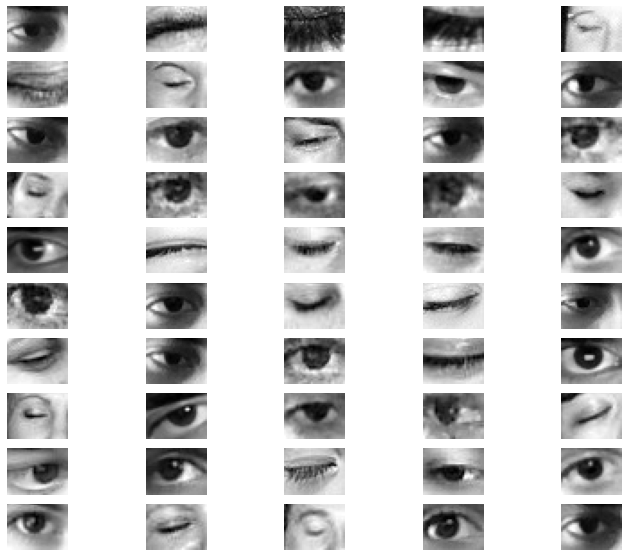

In [5]:
# 내가 봤을때 왼쪽 눈
plt.figure(figsize=(12, 10))
for i in range(50):
    plt.subplot(10, 5, i+1) #함수의 인자를 (행,열,인덱스) 에서 행열인덱스 로 활용하는
    plt.axis('off') 
    plt.imshow(X[i].reshape((26, 34)), cmap='gray')

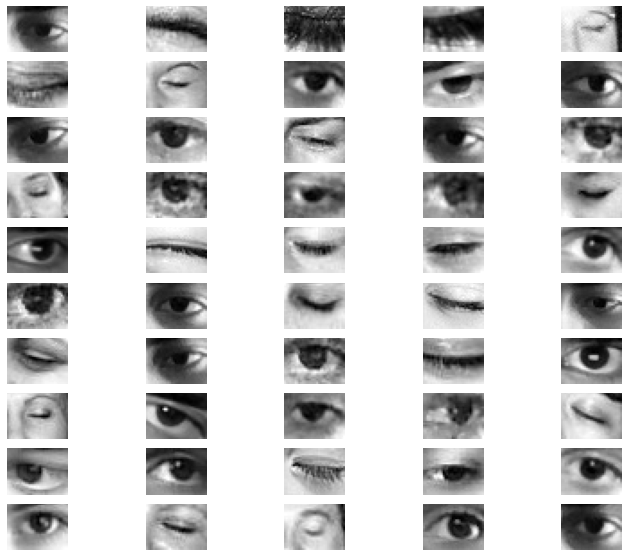

In [6]:
# 내가 봤을때 오른쪽 눈
plt.figure(figsize=(12, 10))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(cv2.flip(X[i].reshape((26, 34)),1), cmap='gray')

/home/jy/miniconda3/envs/video/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

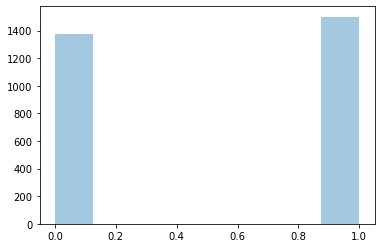

In [7]:
#실제 데이터 처리 
sns.distplot(y, kde=False)

# PreProcessing

In [8]:
n_total = len(X) #이미지 총 갯수 2874

#행렬을 만드는 데 빈행렬을 만드는것 26*34*1 형태의 빈행렬을 만드는 것
#길이가 2874인 리스트 안에 각 요소가 26*34*1인 3층 리스트들이 들어있는 것
leftX_result = np.empty((n_total, 26, 34, 1)) 
rightX_result = np.empty((n_total, 26, 34, 1)) 


#리스트를 for문으로 돌리는 데 그때 변수에 순서를 넣어주는 것
for i, x in enumerate(X):
    #이미지를 만드는 곳
    left_img = x.reshape((26,34,1)) # 눈동자에 해당하는 크기만 잘라서 아까 만든 빈 행렬에 차례로 채우는 것
    right_img = cv2.flip(x.reshape((26,34,1)),1).reshape((26,34,1)) # 위는 왼쪽, 아래는 반전을 사용해서 오른쪽으로 만듦
    
    #각각 왼쪽 오른쪽 빈 행렬에 짜
    leftX_result[i] = left_img
    rightX_result[i] = right_img
    
    

In [9]:
#enumerate부터
listA = ['a', 'b', 'c']

for l in listA:
    print(l)

#이때 enumerate를 사용하는 것
#인덱스값을 자동으로 할당
for number, l in enumerate(listA):
    print(number,l)
    
#위에는 튜플로 이루어진 걸 두개의 변수로 나눈거고 아래는 그대로 튜플채로 갖고오는 것
for ls in enumerate(listA):
    print(ls)

a
b
c
0 a
1 b
2 c
(0, 'a')
(1, 'b')
(2, 'c')


In [10]:
from sklearn.model_selection import train_test_split

#왼쪽
left_x_train, left_x_val, left_y_train, left_y_val = train_test_split(leftX_result, y, test_size = 0.1) #y=0 or 1(눈깜박임), 0.1은 검증 테스트, 나머지 0.9는 학습

#오른쪽
right_x_train, right_x_val, right_y_train, right_y_val = train_test_split(rightX_result, y, test_size = 0.1) #y=0 or 1(눈깜박임), 0.1은 검증 테스트, 나머지 0.9는 학습

print('왼쪽')
print(left_x_train.shape, left_y_train.shape)
print(left_x_val.shape, left_y_val.shape)

print('오른쪽')
print(right_x_train.shape, right_y_train.shape)

np.save('datas/left_x_train.npy', left_x_train)
np.save('datas/left_x_val.npy', left_x_val)
np.save('datas/left_y_train.npy', left_y_train)
np.save('datas/left_y_val.npy', left_y_val)

np.save('datas/right_x_train.npy', right_x_train)
np.save('datas/right_x_val.npy', right_x_val)
np.save('datas/right_y_train.npy', right_y_train)
np.save('datas/right_y_val.npy', right_y_val)

왼쪽
(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)
오른쪽
(2586, 26, 34, 1) (2586, 1)


In [11]:
#end, 여기가 중요